正規分布であることが分かると、シミュレーションをすることなく計算をするだけで様々なことが分かる。<br>
ここでは、確率密度関数の取り扱い方法とPythonにおける実装の仕方を説明する。<br>

In [1]:
# ライブラリのimport
import numpy as np
import pandas as pd
# 表示桁数の指定
%precision 3
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import scipy as sp
from scipy import stats
# グラフをjupyter notebook内に表示
%matplotlib inline

### <font color='blue'>確率密度</font>

x = 3, mu(平均) = 4, sigma(標準偏差) = 0.8の確率密度は以下のように計算できる。<br>

In [2]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.228

mu(平均)=4, sigma(標準偏差)=0.8を持つ正規分布のインスタンスを作成

In [3]:
norm_dist = stats.norm(loc=4, scale=0.8)

pdf関数を用いる

In [4]:
norm_dist.pdf(x = 3)

0.228

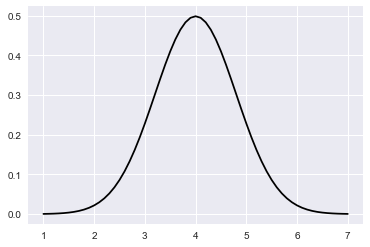

In [5]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
    x_plot,
    stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
    color='black'
)

### <font color = 'blue'>標本がある値以下となる割合</font>

ある値以下となったデータの個数 / サンプルサイズ

In [6]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale =0.8, size = 100000
)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

3以下となるデータの個数は比較演算子を使うことで計算できる。<br>

In [7]:
sp.sum(simulated_sample <= 3)

10371

In [8]:
sp.sum(simulated_sample<=3) / len(simulated_sample)

0.104

### <font color='blue'>累積分布関数</font>

ある値以下となる確率を計算してくれるモノ。<br>
ここで３以下となる確率を計算する。<br>
正規分布である場合、-無限 - 3以下を積分することで確率を計算可能。<br>

Pythonで簡単に計算可能。<br>

In [9]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.106

割合で求めた値とほぼ同じであることに注目。<br>

正規分布は平均に対して左右対称なので、「データが平均値以下になる確率」は50%である。<brs>

In [10]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.500

### <font color='blue'>下側確率とパーセント点</font>

データがある値以下となる確率のことを下側確率という。<br>
下側確率は累積分布関数を用いることで得られる。<br>

逆に「ある確率になる基準値」のことをパーセント点という。<br>

### <font color = 'blue'>パーセント点</font>

母集団分布が平均４, 標準偏差0.8である時に、下側確率が2.5%となるパーセント点を求める。<br>

In [11]:
# パーセント点を求める。
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.432

下側確率とパーセント点の関係から、以下の関係が成り立つ。<br>

In [12]:
sitagawa = stats.norm.cdf(loc = 4, scale = 0.8, x = 3) # どれくらいの確率でこの値以下か
stats.norm.ppf(loc = 4, scale = 0.8, q = sitagawa) # 確率から値を求める

3.000

In [13]:
# パーセント点を求める（50%）
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.000

### <font color='blue'>標準正規分布</font>

平均０、分散１の正規分布のことを標準正規分布という。<br>
N(x|0, 1)<br>

### <font color = 'blue'>t値</font>

t値 = (標本平均 - 母平均) / 標準誤差<br>

標準化とは、平均を0、分散を1にする変換のことであった。<br>
（データ - 平均） ÷ 標準偏差<br>

### <font color='blue'>t値の標本分布</font>

以下の要領でシミュレーションを行う。<br>
1. 母集団分布がN(x | 4, 0.8^2)である母集団から、抽出シミュレーションを行う。<br>
2. 得られた標本から標本平均を求める。<br>
3. 得られた標本から標準誤差を求める。<br>
4. 「（標本平均 - 母平均） ÷ 標準誤差という計算よりt値を計算<br>
5. この試行を10000回繰り返す。<br>

In [14]:
# 乱数の種
np.random.seed(1)
# t値を格納する入れ物
t_value_array = np.zeros(10000)
# 正規分布のクラスのインスタンス
norm_dist = stats.norm(loc=4, scale=0.8)
# シミュレーションの実行
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)  
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(len(sample)) # 標準誤差
    t_value_array[i] = (sample_mean - 4) / sample_se

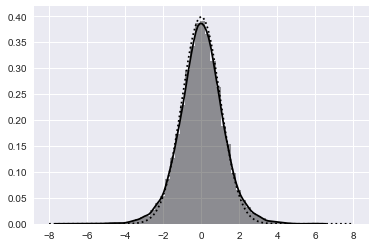

In [15]:
# t値のヒストグラム
sns.distplot(t_value_array, color='black')
# 標準正規分布の確率密度
x = np.arange(start = -8, stop = 8.1, step = 0.1)
# 標準正規分布にする
plt.plot(x, stats.norm.pdf(x = x), color='black', linestyle='dotted')

### <font color = 'blue'>t分布</font>

#### 母集団が正規分布である時のt値の標本分布のことをt分布という<br>
サンプルサイズが10の時は９<br>

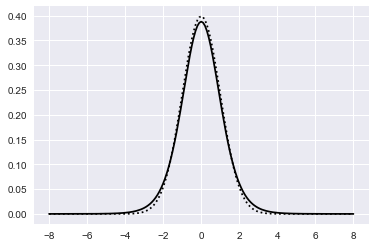

In [19]:
plt.plot(x, stats.norm.pdf(x = x), color='black', linestyle='dotted')
plt.plot(x, stats.t.pdf(x = x, df = 9), color='black')

母分散がわかっていない状況でも、標本平均の分布について言及することができる。<br>